In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
import re


In [56]:
evmaker = pd.read_csv(r"C:\Users\priyanka\Downloads\ev marker by place.csv\EV Maker by Place.csv.csv")
op = pd.read_csv(r"C:\Users\priyanka\Downloads\operational pc.csv\OperationalPC.csv.csv")
vclass = pd.read_csv(r"C:\Users\priyanka\Downloads\vechile class all.csv\Vehicle Class - All.csv")
evcat = pd.read_csv(r"C:\Users\priyanka\Downloads\ev cat.csv\ev_cat_01-24.csv.csv")
catmaker = pd.read_csv(r"C:\Users\priyanka\Downloads\EV sales by markers and cat.csv\ev_sales_by_makers_and_cat_15-24.csv.csv")


In [57]:
print(evmaker.head(3))
print(op.head(3))
print(vclass.head(3))
print(evcat.head(3))
print(catmaker.head(3))

            EV Maker      Place        State
0        Tata Motors       Pune  Maharashtra
1  Mahindra Electric  Bengaluru    Karnataka
2       Ather Energy  Bengaluru    Karnataka
               State  No. of Operational PCS
0  Andaman & Nicobar                       3
1     Andhra Pradesh                     327
2  Arunachal Pradesh                       9
                     Vehicle Class Total Registration
0  FOUR WHEELER (INVALID CARRIAGE)             21,346
1              HEAVY GOODS VEHICLE          58,70,865
2              HEAVY MOTOR VEHICLE           1,02,965
       Date  FOUR WHEELER (INVALID CARRIAGE)  HEAVY GOODS VEHICLE  \
0         0                                0                    0   
1  01/01/01                                0                    1   
2  01/01/02                                0                    2   

   HEAVY MOTOR VEHICLE  HEAVY PASSENGER VEHICLE  LIGHT GOODS VEHICLE  \
0                    0                        0                    0   
1  

In [58]:
print(evmaker.isnull().values.any())


False


In [59]:
makers_count = evmaker['State'].value_counts().sort_values(ascending=False)


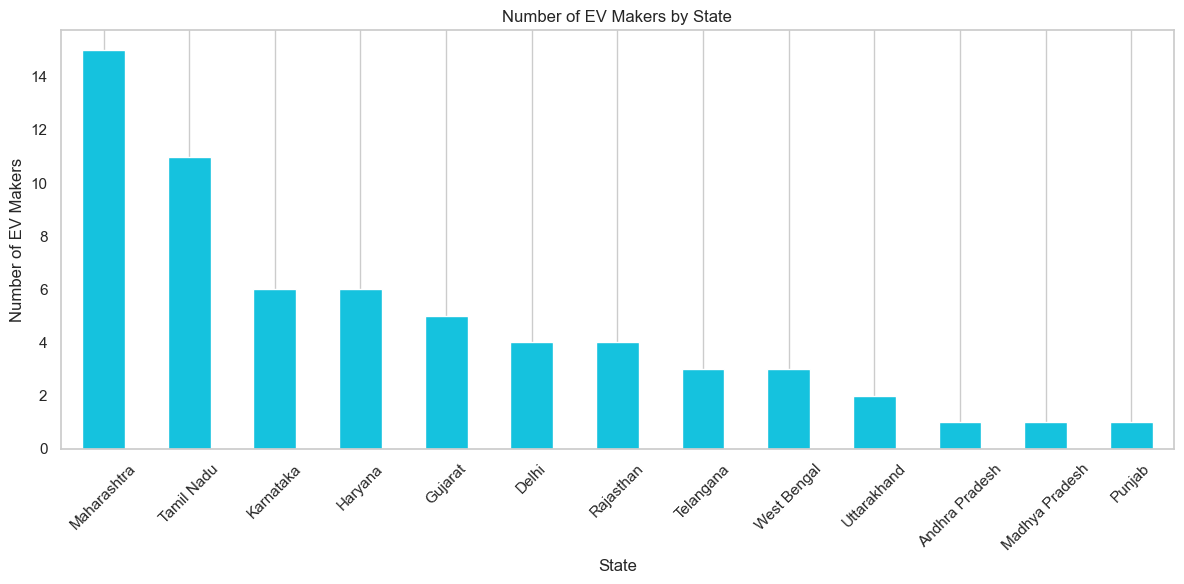

In [60]:
plt.figure(figsize=(12,6))
makers_count.plot(kind='bar', color='#15c2de')
plt.title('Number of EV Makers by State')
plt.xlabel('State')
plt.ylabel('Number of EV Makers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Key Insights from the Chart
Maharashtra leads with the highest number of EV makers (15), followed by Tamil Nadu (11).

Karnataka and Haryana each have 6 EV makers, while Gujarat has 5.

Other notable states with significant EV manufacturing presence are Delhi, Rajasthan, Telangana, and West Bengal.

States like Andhra Pradesh, Madhya Pradesh, and Punjab have a minimal presence (1 EV maker each).

## Strategic Implications
Maharashtra and Tamil Nadu are the primary hubs for EV manufacturing in India, making them attractive for partnerships, supply chain efficiencies, and early market entry.

States with a higher number of manufacturers are likely to have better-developed ecosystems for EVs, including suppliers, skilled labor, and support infrastructure.

Targeting states with a strong manufacturing base can facilitate easier scaling and collaboration.

In [61]:
# Remove commas and convert 'Total Registration' to integer
vclass['Total Registration'] = (
    vclass['Total Registration']
    .astype(str)
    .str.replace(',', '')
    .astype(int)
)

# Calculate total registrations
total_registrations = vclass['Total Registration'].sum()

# Calculate percentage and add it as a new column
vclass['vclass_Percent'] = (
    vclass['Total Registration'] / total_registrations * 100
)

# Sort by the new percentage column
vclass = vclass.sort_values(by='vclass_Percent', ascending=False)

# Display the result
print(vclass[['Vehicle Class', 'Total Registration', 'vclass_Percent']])


                      Vehicle Class  Total Registration  vclass_Percent
14                  TWO WHEELER(NT)           274971646       73.208671
5               LIGHT MOTOR VEHICLE            65061773       17.322098
12                 THREE WHEELER(T)            10708473        2.851032
4               LIGHT GOODS VEHICLE            10249591        2.728859
1               HEAVY GOODS VEHICLE             5870865        1.563064
6           LIGHT PASSENGER VEHICLE             4343410        1.156393
10       OTHER THAN MENTIONED ABOVE             1126398        0.299893
7              MEDIUM GOODS VEHICLE              875789        0.233171
3           HEAVY PASSENGER VEHICLE              828189        0.220498
11                THREE WHEELER(NT)              679804        0.180992
9          MEDIUM PASSENGER VEHICLE              325015        0.086532
8              MEDIUM MOTOR VEHICLE              194600        0.051810
15                   TWO WHEELER(T)              129181        0

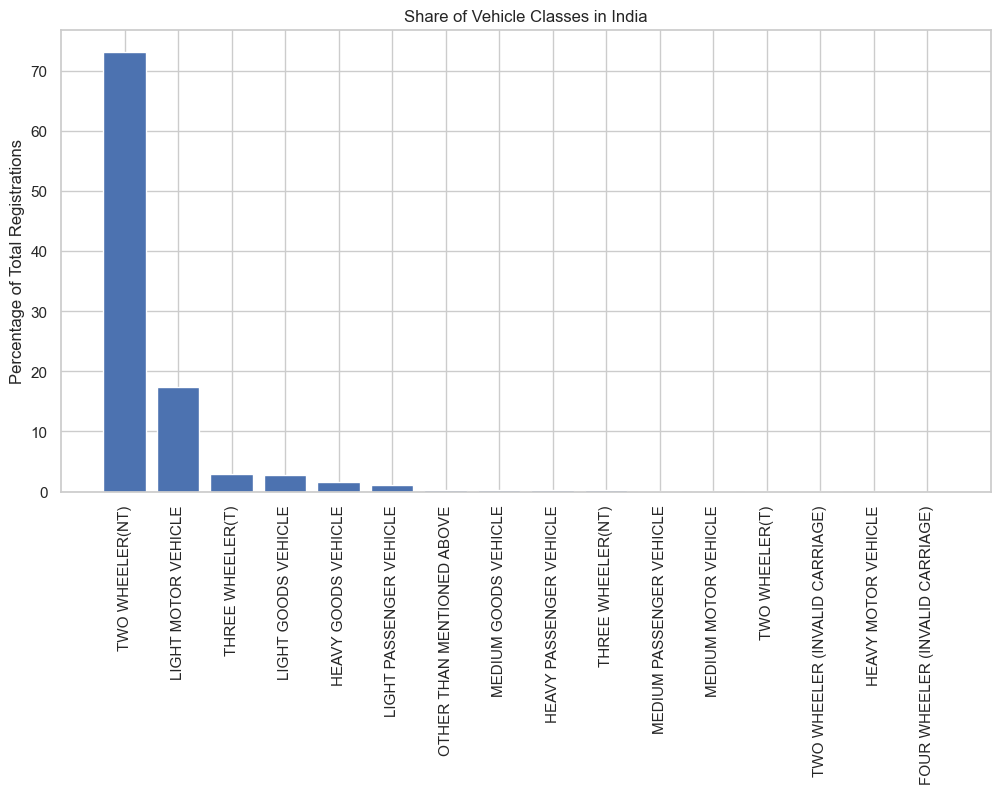

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(vclass['Vehicle Class'], vclass['vclass_Percent'])
plt.xticks(rotation=90)
plt.ylabel('Percentage of Total Registrations')
plt.title('Share of Vehicle Classes in India')
plt.show()


## EV Adoption Focus: 
Since two-wheelers and three-wheelers dominate the vehicle landscape, EV startups and manufacturers should prioritize these segments for maximum market impact and faster adoption

## Market Opportunity
Conversion Potential: The overwhelming presence of two-wheelers and three-wheelers means that even a small percentage shift to electric in these categories will result in large absolute numbers of EVs.

Growth Segments: As the EV market grows (with over 20 lakh EVs sold in FY25 and two-wheelers holding over 50% of EV sales), these segments will continue to drive the bulk of new electric registrations

Vehicle Class	            % of Total Registrations	         Strategic Insight
Two Wheeler (NT)	        ~73%	                             Primary EV target segment
Light Motor Vehicle	        ~17%	                             Secondary EV target (cars, small vans)
Three Wheeler (T)	        ~2.8%	                             Key for urban mobility/logistics
Light Goods Vehicle	        ~2.7%	                             Urban delivery/logistics
Others (Heavy/Medium)	    <5%	                                 Niche, commercial focus

In [63]:
print(op.info())

print(op['No. of Operational PCS'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State                   34 non-null     object
 1   No. of Operational PCS  34 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 676.0+ bytes
None
count      34.000000
mean      357.235294
std       617.579099
min         1.000000
25%        18.750000
50%       129.500000
75%       451.250000
max      3079.000000
Name: No. of Operational PCS, dtype: float64



Top 5 states by number of operational PCS:
          State  No. of Operational PCS
19  Maharashtra                    3079
8         Delhi                    1886
15    Karnataka                    1041
16       Kerala                     852
28   Tamil Nadu                     643


C:\Users\priyanka\AppData\Local\Temp\ipykernel_15284\1715014831.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=op_sorted, x='State', y='No. of Operational PCS', palette='viridis')


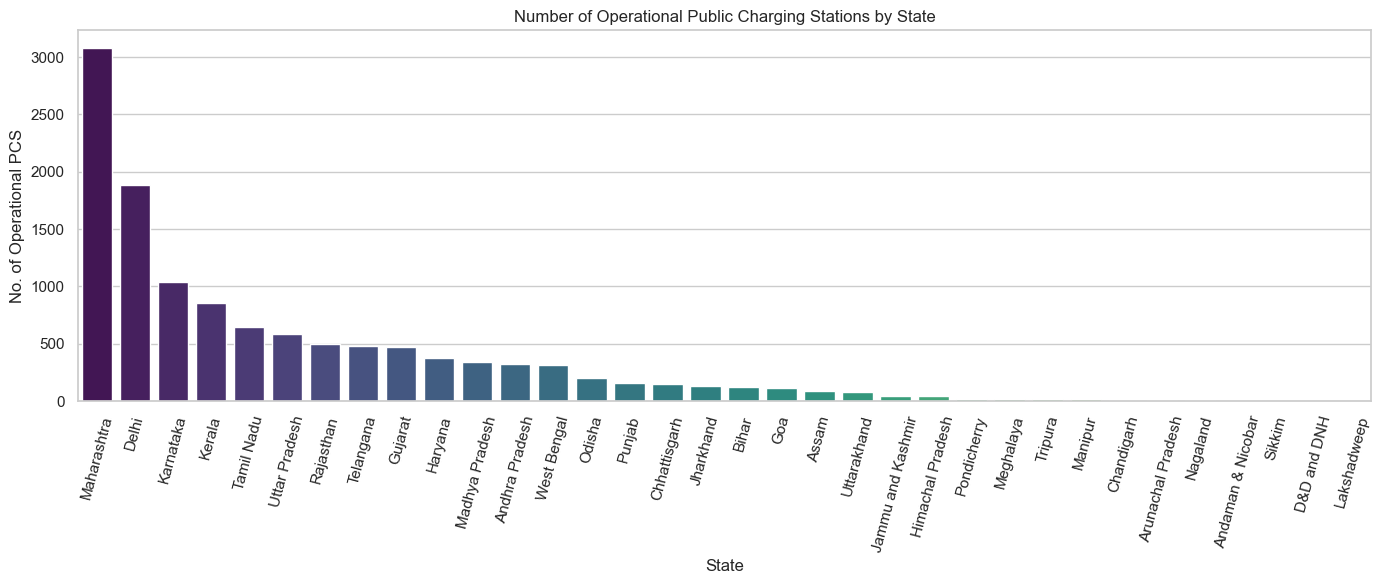

In [64]:

# Sort states by number of charging stations (descending)
op_sorted = op.sort_values('No. of Operational PCS', ascending=False)
print('\nTop 5 states by number of operational PCS:')
print(op_sorted.head())

# Bar plot: Number of charging stations by state
plt.figure(figsize=(14,6))
sns.barplot(data=op_sorted, x='State', y='No. of Operational PCS', palette='viridis')
plt.xticks(rotation=75)
plt.title('Number of Operational Public Charging Stations by State')
plt.ylabel('No. of Operational PCS')
plt.xlabel('State')
plt.tight_layout()
plt.show()

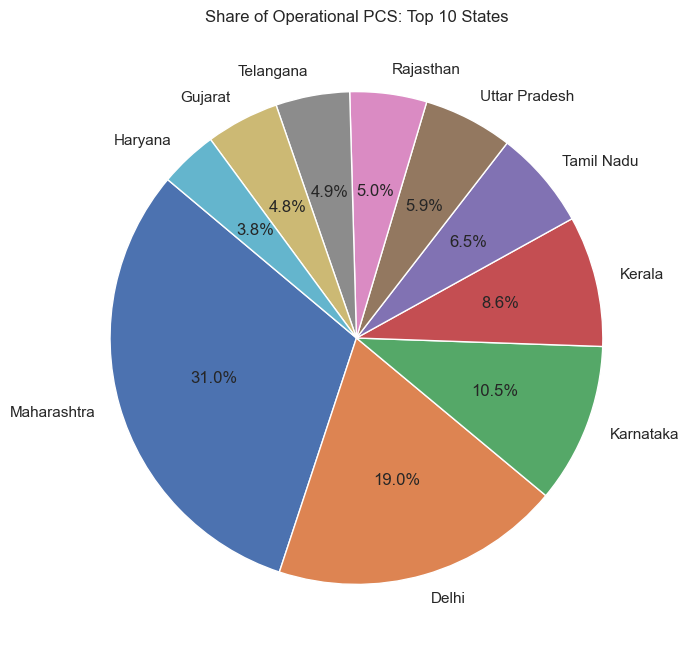

In [65]:
# Pie chart: Share of top 10 states
top10 = op_sorted.head(10)
plt.figure(figsize=(8,8))
plt.pie(top10['No. of Operational PCS'], labels=top10['State'], autopct='%1.1f%%', startangle=140)
plt.title('Share of Operational PCS: Top 10 States')
plt.show()

In [66]:
# Identify states with very low charging infra (<20 stations)
low_infra = op[op['No. of Operational PCS'] < 20]
print('\nStates with less than 20 operational PCS:')
print(low_infra[['State', 'No. of Operational PCS']])


States with less than 20 operational PCS:
                State  No. of Operational PCS
0   Andaman & Nicobar                       3
2   Arunachal Pradesh                       9
5          Chandigarh                      12
7         D&D and DNH                       1
17        Lakshadweep                       1
20            Manipur                      17
22           Nagaland                       6
27             Sikkim                       2
30            Tripura                      18


## Rapid Growth: 
Public charging stations (PCS) nearly doubled from 6,586 (Mar 2023) to 12,146 (Feb 2024), showing strong government and industry momentum.

## State Disparity:

Leaders: Maharashtra (3,079), Delhi (1,886), Karnataka (1,041), Kerala (852), Tamil Nadu (643).

Lagging States: Many Northeastern states and UTs have <20 PCS, indicating unequal distribution.

## Flexible Planning Required: 
No fixed global PCS-to-EV ratio; Indian guidelines suggest 1 PCS per 20–150 EVs, requiring adaptive strategies based on local conditions.

## Opportunities & Challenges:

Opportunities: High-PCS states are ideal for EV market expansion.

Challenges: Low-PCS regions need targeted infrastructure investment and policy support.

In [67]:
print(evcat.info())

print(evcat.isnull().sum())

print(evcat.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Date                             284 non-null    object
 1   FOUR WHEELER (INVALID CARRIAGE)  284 non-null    int64 
 2   HEAVY GOODS VEHICLE              284 non-null    int64 
 3   HEAVY MOTOR VEHICLE              284 non-null    int64 
 4   HEAVY PASSENGER VEHICLE          284 non-null    int64 
 5   LIGHT GOODS VEHICLE              284 non-null    int64 
 6   LIGHT MOTOR VEHICLE              284 non-null    int64 
 7   LIGHT PASSENGER VEHICLE          284 non-null    int64 
 8   MEDIUM GOODS VEHICLE             284 non-null    int64 
 9   MEDIUM PASSENGER VEHICLE         284 non-null    int64 
 10  MEDIUM MOTOR VEHICLE             284 non-null    int64 
 11  OTHER THAN MENTIONED ABOVE       284 non-null    int64 
 12  THREE WHEELER(NT)                284

In [68]:
evcat['Date'] = pd.to_datetime(evcat['Date'], errors='coerce')
# Aggregate by year 
evcat['Year'] = evcat['Date'].dt.year
yearly_sum = evcat.groupby('Year').sum(numeric_only=True)
print('\nYearly sum:')
print(yearly_sum)



Yearly sum:
        FOUR WHEELER (INVALID CARRIAGE)  HEAVY GOODS VEHICLE  \
Year                                                           
2001.0                                0                    7   
2002.0                                0                    8   
2003.0                                0                    6   
2004.0                                0                    8   
2005.0                                0                    7   
2006.0                                0                    7   
2007.0                                0                    4   
2008.0                                0                    8   
2009.0                                0                    2   
2010.0                                0                   20   
2011.0                                0                   14   
2012.0                                0                   21   
2013.0                                0                   21   
2014.0                     

C:\Users\priyanka\AppData\Local\Temp\ipykernel_15284\2667486757.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  evcat['Date'] = pd.to_datetime(evcat['Date'], errors='coerce')


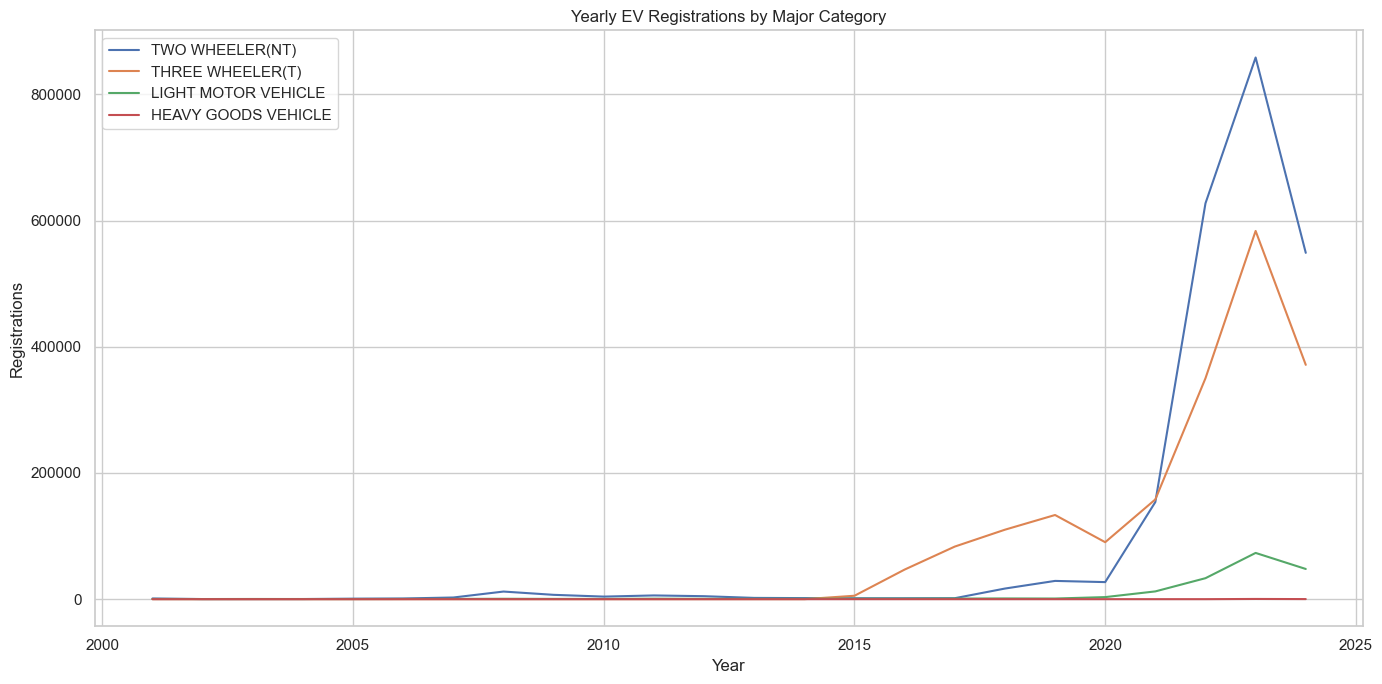

In [69]:
# Convert 'Date' to datetime if not done
evcat['Date'] = pd.to_datetime(evcat['Date'], errors='coerce')
evcat['Year'] = evcat['Date'].dt.year

# Aggregate yearly sum
yearly = evcat.groupby('Year')[['TWO WHEELER(NT)', 'THREE WHEELER(T)', 'LIGHT MOTOR VEHICLE', 'HEAVY GOODS VEHICLE']].sum()

# Plot
plt.figure(figsize=(14, 7))
for col in yearly.columns:
    plt.plot(yearly.index, yearly[col], label=col)

plt.legend()
plt.title('Yearly EV Registrations by Major Category')
plt.xlabel('Year')
plt.ylabel('Registrations')
plt.tight_layout()
plt.show()


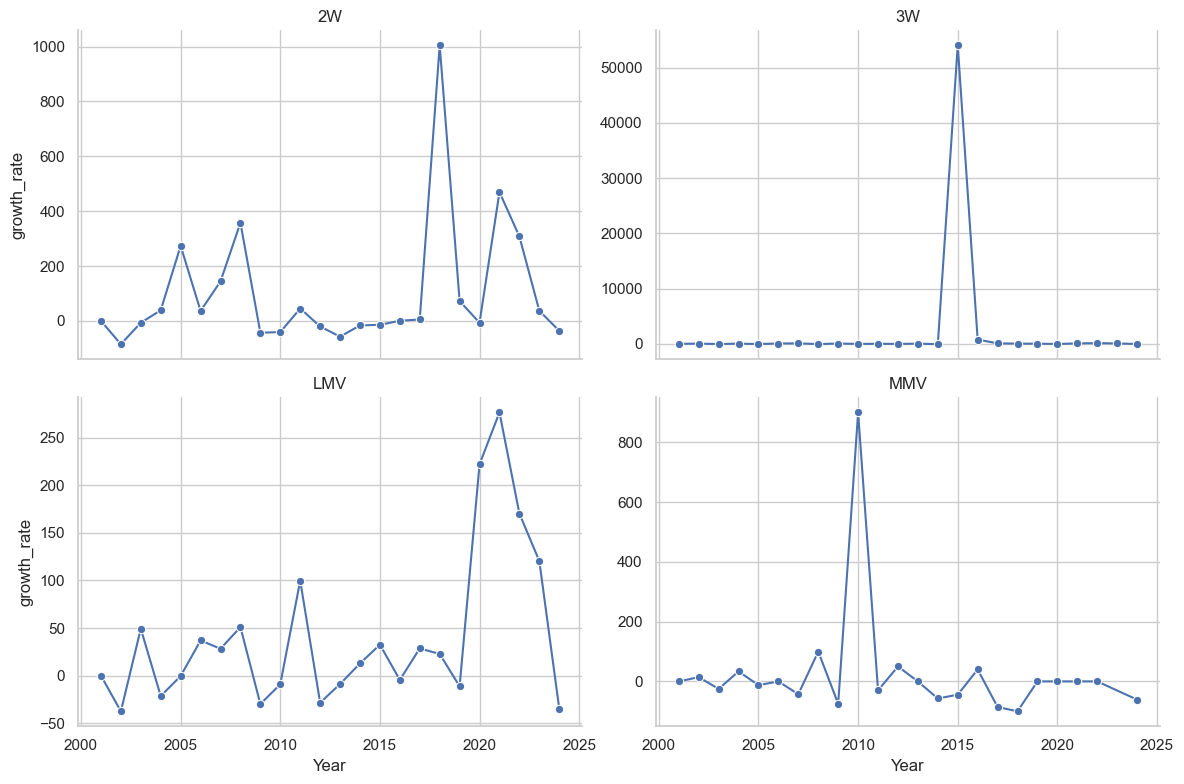

In [70]:
# Aggregate by year for selected categories
categories = {
    'TWO WHEELER(NT)': '2W',
    'THREE WHEELER(T)': '3W',
    'LIGHT MOTOR VEHICLE': 'LMV',
    'HEAVY GOODS VEHICLE': 'MMV'
}

# Melt and rename categories for long-form data
df_long = (
    evcat.groupby('Year')[list(categories.keys())]
    .sum()
    .reset_index()
    .melt(id_vars='Year', var_name='Category', value_name='Registrations')
)
df_long['Cat'] = df_long['Category'].map(categories)

# Calculate year-over-year growth rate
df_long['growth_rate'] = df_long.groupby('Cat')['Registrations'].pct_change() * 100
df_long['growth_rate'] = df_long['growth_rate'].fillna(0)

# Plot using seaborn's FacetGrid
sns.set(style='whitegrid')
g = sns.FacetGrid(df_long, col="Cat", col_wrap=2, sharey=False, height=4, aspect=1.5)
g.map_dataframe(sns.lineplot, x="Year", y="growth_rate", marker="o")
g.set_axis_labels("Year", "growth_rate")
g.set_titles("{col_name}")
g.tight_layout()
plt.show()


Mass adoption is driven by two and three-wheelers, likely due to cost, convenience, and urban utility.

Policy support and subsidies post-2020 may have boosted registrations significantly.

Commercial or heavy segments are lagging, possibly due to infrastructure or technological limitations (e.g., battery capacity, load).

Two-Wheelers (2W) and Light Motor Vehicles (LMV) show volatile but significant spikes in growth rates, indicating periods of aggressive adoption.

Three-Wheelers (3W) had a sharp spike around 2011–2012, possibly from a small base, and then stabilized.

Medium Motor Vehicles (MMV) also experienced a sudden growth spike around 2010, then fell flat.

## Conclusion:

Adoption surges are not linear—they often follow policy changes, economic incentives, or technological improvements.

The recent surge in LMV and 2W growth rates indicates broadening adoption and likely greater consumer confidence.

Growth is highly uneven across categories, hinting at category-specific barriers or enablers (e.g., battery range, cost of vehicles, infrastructure readiness).




In [71]:
print(catmaker.isnull().sum())

Cat      0
Maker    0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
2021     0
2022     0
2023     0
2024     0
dtype: int64


In [72]:
# Convert year columns to numeric
years = [str(year) for year in range(2015, 2025)]
catmaker[years] = catmaker[years].apply(pd.to_numeric, errors='coerce')

# Aggregate total sales by category (2W, 3W, LMV, MMV)
sales_by_cat = catmaker.groupby('Cat')[years].sum().T
print("\nTotal sales by category per year:")
print(sales_by_cat)


Total sales by category per year:
Cat       2W      3W    LMV  MMV
2015    1439    5415    892    6
2016    1444   46905    896    4
2017    1525   83350   2140    4
2018   17075  110179   2497   12
2019   30376  133496   1784  130
2020   29123   90386   4226   35
2021  156324  158258  14018  254
2022  631393  350546  38569   25
2023  860398  583712  84829  295
2024  550351  372016  56537   39


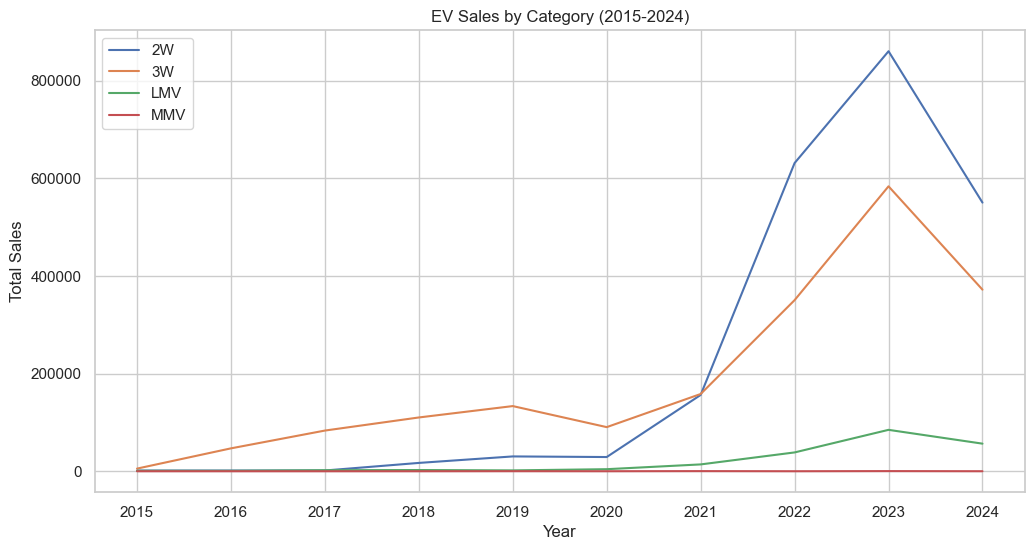

In [73]:
# sales trends by category over the years
plt.figure(figsize=(12,6))
for cat in sales_by_cat.columns:
    plt.plot(sales_by_cat.index, sales_by_cat[cat], label=cat)
plt.title('EV Sales by Category (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
# Aggregate total sales by maker for the latest year (2024)
top_makers_2024 = catmaker.groupby('Maker')['2024'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 makers by sales in 2024:")
print(top_makers_2024)


Top 10 makers by sales in 2024:
Maker
OLA ELECTRIC TECHNOLOGIES PVT LTD       211273
TVS MOTOR COMPANY LTD                    98615
BAJAJ AUTO LTD                           90160
ATHER ENERGY PVT LTD                     58547
TATA PASSENGER ELECTRIC MOBILITY LTD     35830
MAHINDRA LAST MILE MOBILITY LTD          34761
YC ELECTRIC VEHICLE                      23892
HERO MOTOCORP LTD                        19479
GREAVES ELECTRIC MOBILITY PVT LTD        18424
SAERA ELECTRIC AUTO PVT LTD              16408
Name: 2024, dtype: int64


C:\Users\priyanka\AppData\Local\Temp\ipykernel_15284\1068320853.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makers_2024.index, y=top_makers_2024.values, palette='coolwarm')


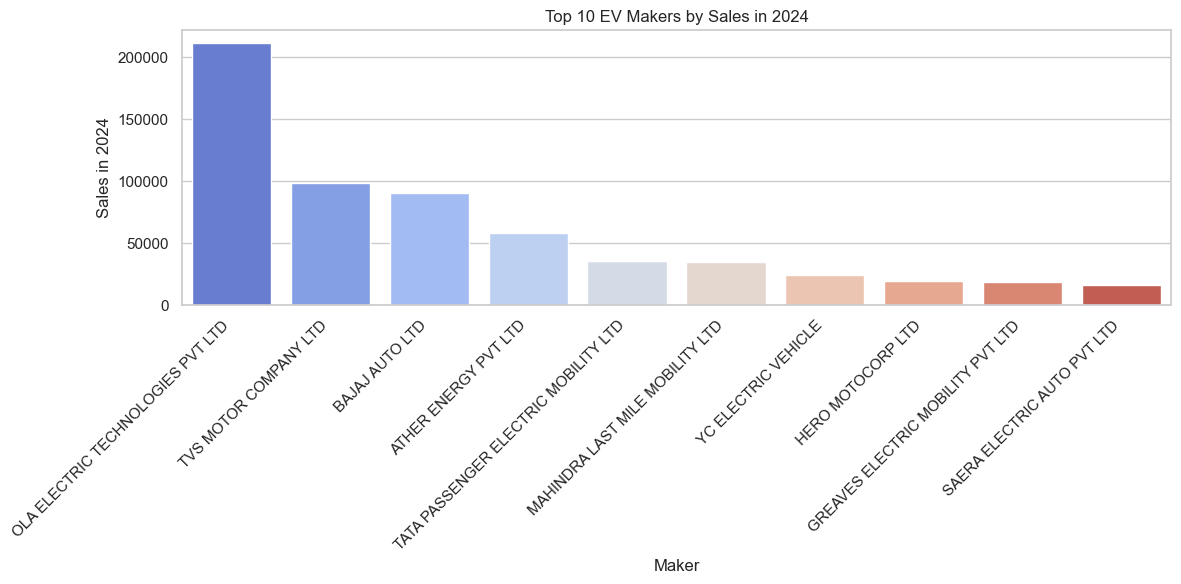

In [75]:
# Plot top 10 makers by sales in 2024
plt.figure(figsize=(12,6))
sns.barplot(x=top_makers_2024.index, y=top_makers_2024.values, palette='coolwarm')
plt.title('Top 10 EV Makers by Sales in 2024')
plt.xlabel('Maker')
plt.ylabel('Sales in 2024')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 2023 Peak, 2024 Dip:
Sales across all categories peaked in 2023 and dropped in 2024, likely due to policy changes or market adjustments.

## Market is Concentrated:
A few manufacturers (like OLA Electric, TVS Motor, Bajaj Auto) lead the market, especially in 2W.

## Focus for New Entrants:
2W and 3W segments offer the largest and fastest-growing opportunities for new EV players.

## Competitive, Dynamic Landscape:
Both startups and established brands are active, but innovation and affordability drive success.


In [76]:
years = [str(y) for y in range(2015, 2025)]
# Aggregate total sales by category
cat_sales = catmaker.groupby('Cat')[years].sum().T

# Calculate cumulative sales by category
cat_totals = cat_sales.sum(axis=0).sort_values(ascending=False)
print("Cumulative EV sales by category (2015-2024):")
print(cat_totals)


Cumulative EV sales by category (2015-2024):
Cat
2W     2279448
3W     1934263
LMV     206388
MMV        804
dtype: int64


## Geographic segmentation by states 

c:\Users\priyanka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


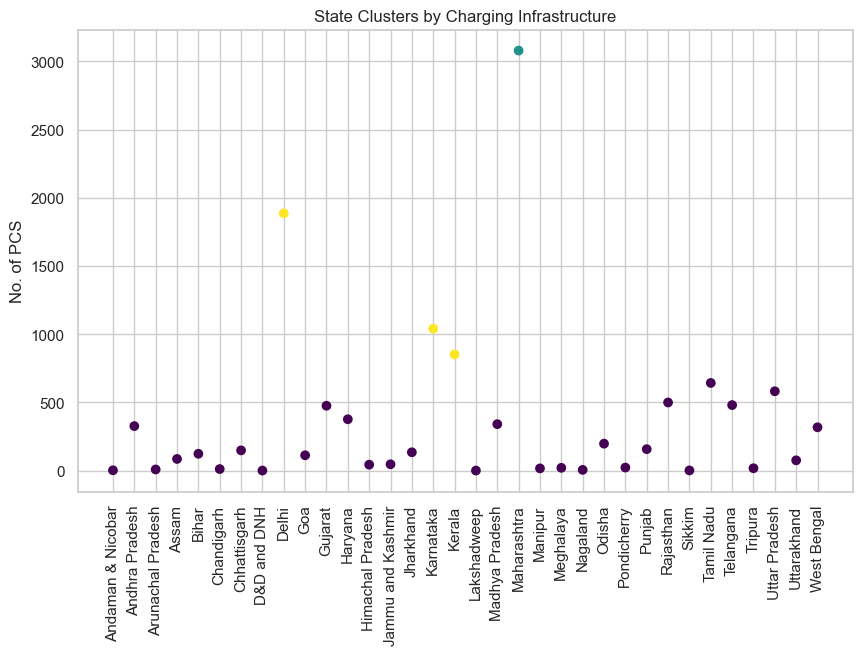

In [77]:
from sklearn.cluster import KMeans
# Feature scaling
X = op[['No. of Operational PCS']]

# K-means clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
op['Cluster'] = kmeans.fit_predict(X)

# Visualize
plt.figure(figsize=(10,6))
plt.scatter(op['State'], op['No. of Operational PCS'], 
            c=op['Cluster'], cmap='viridis')
plt.xticks(rotation=90)
plt.title('State Clusters by Charging Infrastructure')
plt.ylabel('No. of PCS')
plt.show()


## Vehicle Category Segmentation

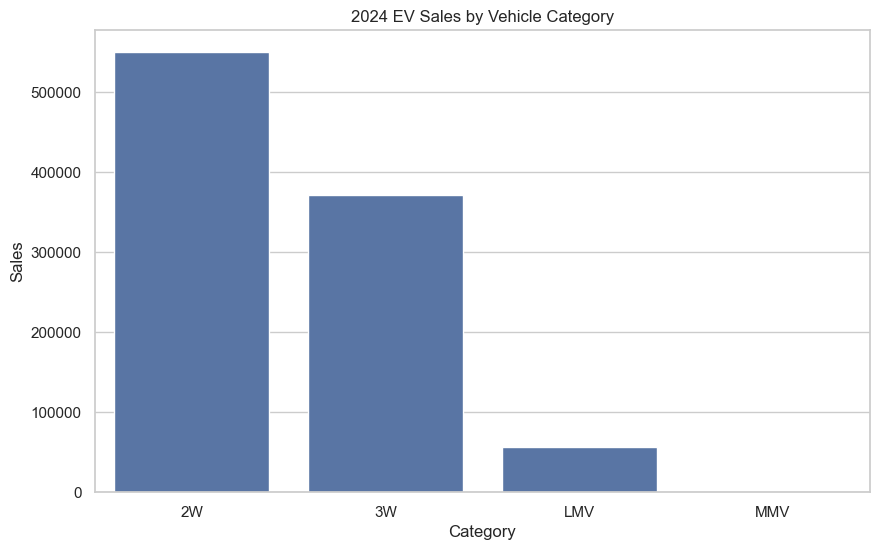

In [78]:
import seaborn as sns

# Aggregate total sales by category
cat_sales = catmaker.groupby('Cat')['2024'].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=cat_sales, x='Cat', y='2024')
plt.title('2024 EV Sales by Vehicle Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


## Insights:

2W (two-wheelers) dominate sales

3W (three-wheelers) are secondary focus

LMV/MMV are niche

In [79]:
import pandas as pd

# Filter for 2W and 3W categories
sales_2w = catmaker[catmaker['Cat'] == '2W']
sales_3w = catmaker[catmaker['Cat'] == '3W']

# Sum sales across all manufacturers for each year
years = [str(y) for y in range(2015, 2025)]
total_2w_sales = sales_2w[years].sum(axis=0)
total_3w_sales = sales_3w[years].sum(axis=0)

def calculate_cagr(start, end, periods):
    # Avoid division by zero
    if start == 0 or pd.isna(start) or pd.isna(end):
        return float('nan')
    return (end/start)**(1/periods) - 1

# Get first and last year's sales for 2W and 3W
start_2w = total_2w_sales.iloc[0]
end_2w = total_2w_sales.iloc[-1]

start_3w = total_3w_sales.iloc[0]
end_3w = total_3w_sales.iloc[-1]

# Calculate periods (number of years)
periods = len(years) - 1  # e.g., 2024-2015 = 9

# Calculate CAGR
cagr_2w = calculate_cagr(start_2w, end_2w, periods)
cagr_3w = calculate_cagr(start_3w, end_3w, periods)

print(f"2W CAGR: {cagr_2w*100:.1f}%" if not pd.isna(cagr_2w) else "2W CAGR: Not defined (start value is zero)")
print(f"3W CAGR: {cagr_3w*100:.1f}%" if not pd.isna(cagr_3w) else "3W CAGR: Not defined (start value is zero)")


2W CAGR: 93.6%
3W CAGR: 60.0%


## 2W (Two-Wheeler) EV Market
93.6% CAGR (2015–2024) indicates explosive growth, driven by:

## Affordable models (e.g., Ola S1 Air, Ather 450X)

Urban mobility demand

FAME-II subsidies

## Strategic Implication: 2W EVs are the primary growth driver for your startup. Prioritize this segment.

In [80]:
# For 2W segment
top_2w =  catmaker[ catmaker['Cat'] == '2W'].groupby('Maker')['2024'].sum().sort_values(ascending=False).head(5)

# For 3W segment
top_3w =  catmaker[ catmaker['Cat'] == '3W'].groupby('Maker')['2024'].sum().sort_values(ascending=False).head(5)

print("Top 2W Manufacturers (2024):\n", top_2w)
print("\nTop 3W Manufacturers (2024):\n", top_3w)


Top 2W Manufacturers (2024):
 Maker
OLA ELECTRIC TECHNOLOGIES PVT LTD    211273
TVS MOTOR COMPANY LTD                 98516
BAJAJ AUTO LTD                        73698
ATHER ENERGY PVT LTD                  58547
HERO MOTOCORP LTD                     19479
Name: 2024, dtype: int64

Top 3W Manufacturers (2024):
 Maker
MAHINDRA LAST MILE MOBILITY LTD    34331
YC ELECTRIC VEHICLE                23892
BAJAJ AUTO LTD                     16461
SAERA ELECTRIC AUTO PVT LTD        16408
PIAGGIO VEHICLES PVT LTD           12869
Name: 2024, dtype: int64


## Predictive Analysis 
## Arima 

c:\Users\priyanka\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


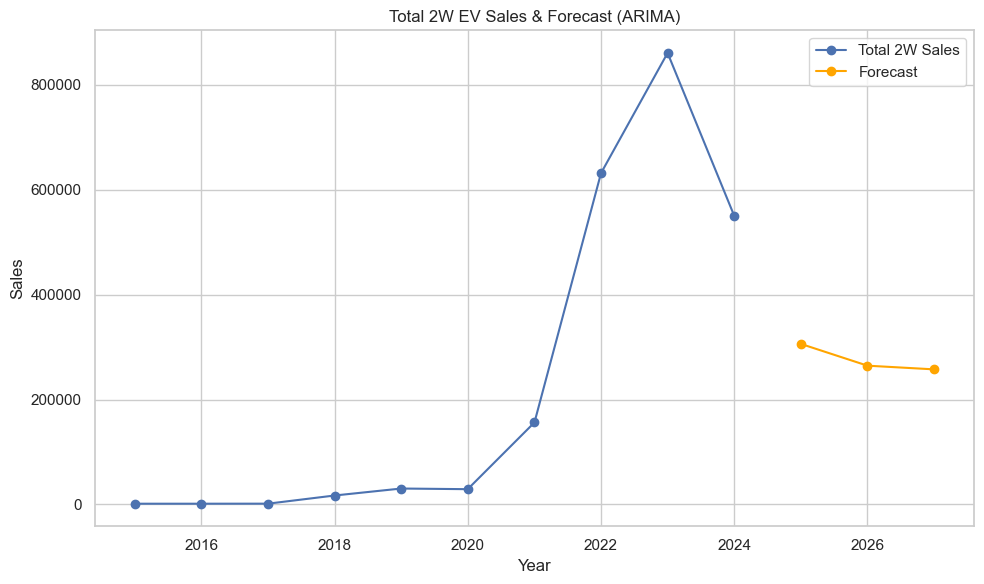

In [81]:
from statsmodels.tsa.arima.model import ARIMA

# Filter for 2W only
sales_2w = catmaker[catmaker['Cat'] == '2W']

# Sum sales for each year across all makers
years = [str(y) for y in range(2015, 2025)]
total_2w_sales = sales_2w[years].sum(axis=0).astype(int)

# Convert the index to datetime (years)
total_2w_sales.index = pd.to_datetime(total_2w_sales.index, format='%Y')

# Plot the actual total 2W sales
plt.figure(figsize=(10,6))
plt.plot(total_2w_sales.index, total_2w_sales.values, marker='o', label='Total 2W Sales')

# Fit ARIMA model (simple order for illustration)
model = ARIMA(total_2w_sales.values, order=(1,1,1))
results = model.fit()

# Forecast next 3 years
forecast_steps = 3
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=total_2w_sales.index[-1] + pd.offsets.YearBegin(), periods=forecast_steps, freq='YS')
forecast_values = forecast.predicted_mean

# Plot the forecast
plt.plot(forecast_index, forecast_values, color='orange', marker='o', label='Forecast')
plt.title('Total 2W EV Sales & Forecast (ARIMA)')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()


## Market Trend Insights
# Explosive Growth (2021–2023):

Rapid rise from near-zero to ~850,000 units in 2023.

# Market Correction (2024):

Sharp drop to ~550,000 units, a ~35% decline from 2023 peak.

# Stabilization Forecast (2025–2027):

Predicted annual sales of 250,000–300,000 units, indicating market maturity.

## Strategic Implications
# Subsidy Impact:

Growth fueled by subsidies (e.g., FAME-II) now reduced, revealing underlying demand.

# Market Maturation:

Shift from hypergrowth to steady, sustainable development.

# Competitive Pressure:

Market saturation and increased competition influencing sales decline.

# Realistic Goals for Startups:

Focus on moderate targets and sustainable models, not unrealistic growth.

# Product Differentiation:

Emphasis will shift to quality, service, and uniqueness, beyond just price or availability.

In [84]:
from statsmodels.tsa.stattools import adfuller

# Check stationarity
adf_test = adfuller(total_2w_sales)
print(f"ADF p-value: {adf_test[1]}")  # If p > 0.05, increase d

# Log-transform to stabilize variance
total_2w_sales_log = np.log(total_2w_sales)


ADF p-value: 1.0


c:\Users\priyanka\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\priyanka\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\priyanka\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\priyanka\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1,1,1) RMSE: 1,068,868.25


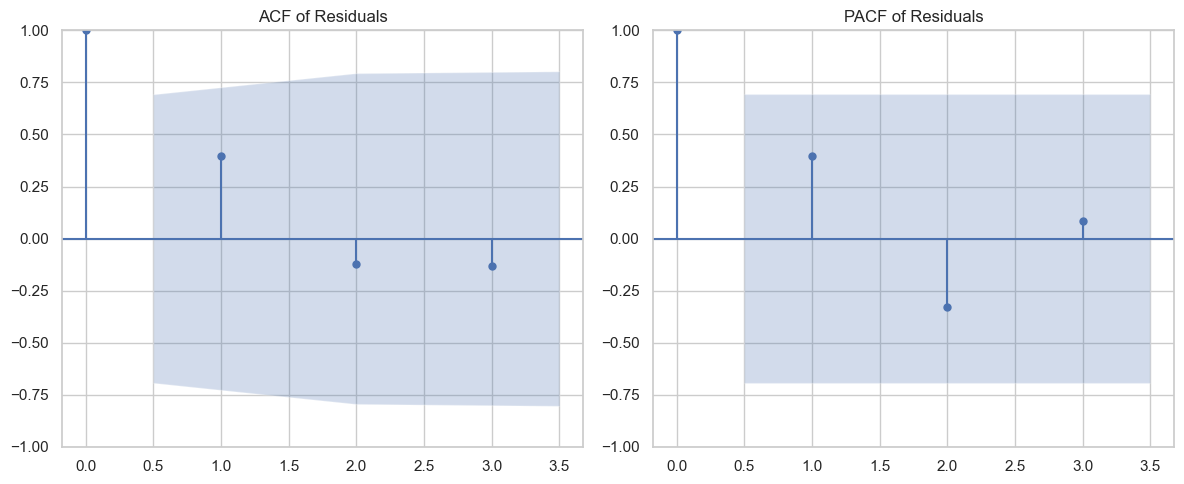


Ljung-Box test results:
    lb_stat  lb_pvalue
1  1.797548   0.180009
2  1.994573   0.368879
3  2.276461   0.517045
4  2.417587   0.659451
5  3.319182   0.650906
6  5.358157   0.498763
7  7.125857   0.415894


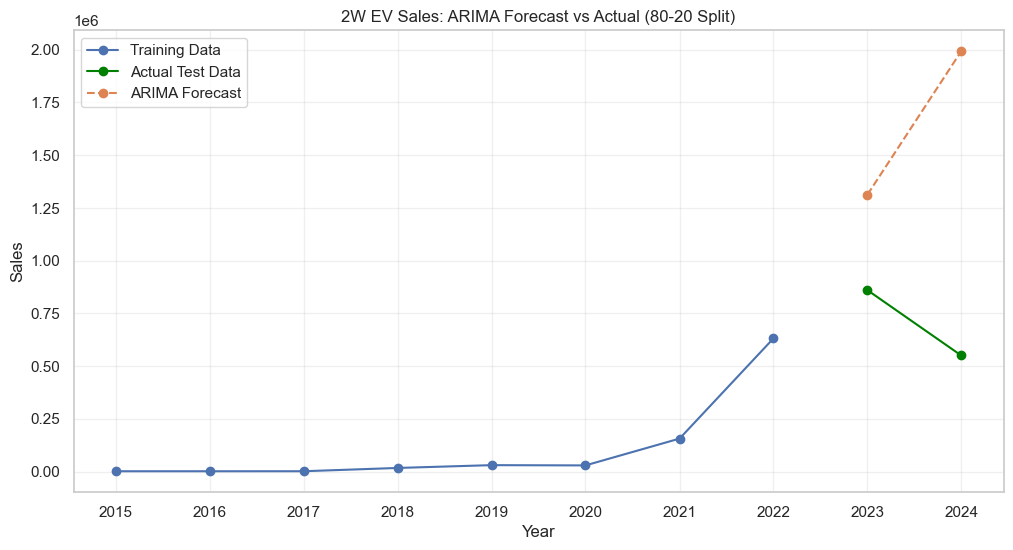

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error

catmaker_2w = catmaker[catmaker['Cat'] == '2W']
years = [str(y) for y in range(2015, 2025)]
total_2w_sales = sales_2w[years].sum(axis=0).astype(int)

# Convert to time series with datetime index
total_2w_sales.index = pd.to_datetime(total_2w_sales.index, format='%Y')
ts = total_2w_sales.sort_index()

# Train-test split (80-20)
train_size = int(len(ts) * 0.8)
train, test = ts.iloc[:train_size], ts.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(1,1,1))
results = model.fit()

# Forecast test period
forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)
predicted = forecast.predicted_mean

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predicted))
print(f"ARIMA(1,1,1) RMSE: {rmse:,.2f}")

# Residual analysis
residuals = results.resid
max_lags = min(20, len(residuals)//2 - 1) if len(residuals) > 2 else 1

# Plot ACF and PACF with adjusted lags
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_acf(residuals, lags=max_lags, ax=plt.gca())
plt.title('ACF of Residuals')
plt.subplot(1,2,2)
plot_pacf(residuals, lags=max_lags, ax=plt.gca())
plt.title('PACF of Residuals')
plt.tight_layout()
plt.show()

# Ljung-Box test for residual randomness
lb_test = acorr_ljungbox(residuals, lags=min(10, len(residuals)-1))
print("\nLjung-Box test results:")
print(lb_test)

# Plot results
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training Data', marker='o')
plt.plot(test.index, test, label='Actual Test Data', marker='o', color='green')
plt.plot(test.index, predicted, label='ARIMA Forecast', marker='o', linestyle='--')
plt.title('2W EV Sales: ARIMA Forecast vs Actual (80-20 Split)')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## ETS model

c:\Users\priyanka\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\priyanka\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


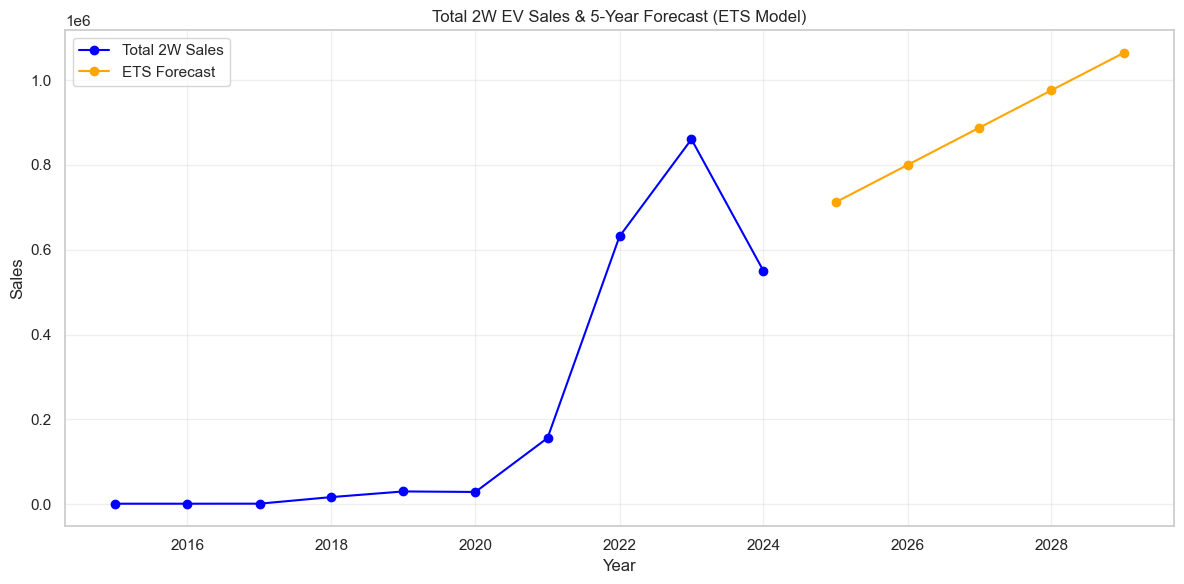

2025: 711,902 units
2026: 799,894 units
2027: 887,887 units
2028: 975,879 units
2029: 1,063,871 units


In [86]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Filter for 2W only
catmaker = catmaker[catmaker['Cat'] == '2W']

years = [str(y) for y in range(2015, 2025)]

# Sum sales for each year across all makers
catmaker_sales = catmaker[years].sum(axis=0)

# Set the index as datetime years
catmaker_sales.index = pd.to_datetime(catmaker_sales.index, format='%Y')

# Fit ETS model (additive trend, no seasonality)
ets_model = ExponentialSmoothing(catmaker_sales, trend='add', seasonal=None, initialization_method='estimated')
ets_fit = ets_model.fit()

# Forecast next 5 years
forecast_steps = 5
ets_forecast = ets_fit.forecast(steps=forecast_steps)

# Create future date index
last_year = catmaker_sales.index[-1]
future_years = pd.date_range(start=last_year + pd.DateOffset(years=1), periods=forecast_steps, freq='YS')
ets_forecast.index = future_years

# Plot
plt.figure(figsize=(12,6))
plt.plot(catmaker_sales.index, catmaker_sales.values, marker='o', label='Total 2W Sales', color='blue')
plt.plot(ets_forecast.index, ets_forecast.values, marker='o', linestyle='-', color='orange', label='ETS Forecast')
plt.title('Total 2W EV Sales & 5-Year Forecast (ETS Model)')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print forecast values
for year, value in zip(ets_forecast.index.year, ets_forecast.values):
    print(f"{year}: {int(value):,} units")


c:\Users\priyanka\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\priyanka\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\priyanka\AppData\Local\Temp\ipykernel_15284\474496520.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat = model_fit.forecast(steps=1)[0]
c:\Users\priyanka\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\priyanka\anaconda3\Lib\site-packages\statsmode

ETS Walk-Forward RMSE: 443,259.13


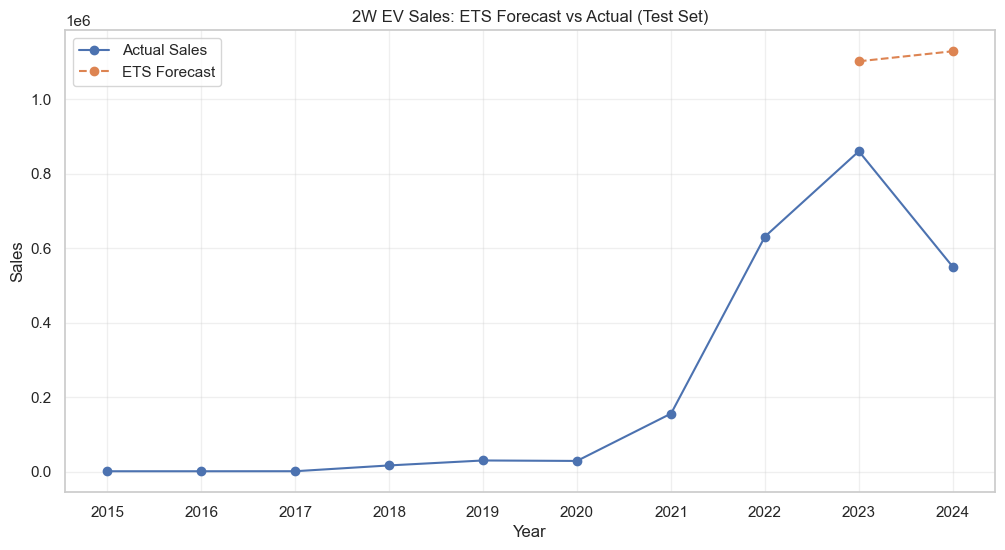

In [87]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

years = [str(y) for y in range(2015, 2025)]
total_2w_sales = catmaker[catmaker['Cat'] == '2W'][years].sum(axis=0)

# Convert to time series with datetime index
total_2w_sales.index = pd.to_datetime(total_2w_sales.index, format='%Y')
ts = total_2w_sales.sort_index()

# Train-test split (80-20)
train_size = int(len(ts) * 0.8)
train, test = ts.iloc[:train_size], ts.iloc[train_size:]

# Walk-forward validation for ETS
history = train.copy()
predictions = []
for t in range(len(test)):
    # Fit model on current history
    model = ExponentialSmoothing(history, trend='add', seasonal=None, initialization_method='estimated')
    model_fit = model.fit()
    
    # Forecast next step
    yhat = model_fit.forecast(steps=1)[0]
    predictions.append(yhat)
    
    # Update history using pd.concat() instead of append
    new_data = pd.Series([test.iloc[t]], index=[test.index[t]])
    history = pd.concat([history, new_data])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f"ETS Walk-Forward RMSE: {rmse:,.2f}")

# Plot results
plt.figure(figsize=(12,6))
plt.plot(ts.index, ts.values, label='Actual Sales', marker='o')
plt.plot(test.index, predictions, label='ETS Forecast', marker='o', linestyle='--')
plt.title('2W EV Sales: ETS Forecast vs Actual (Test Set)')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
